In [523]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 

In [524]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

In [525]:
# Direct convolution between 
def d_conv(W, X):
    # for i in range(0, len(W)):/A
        
    return (X * W)

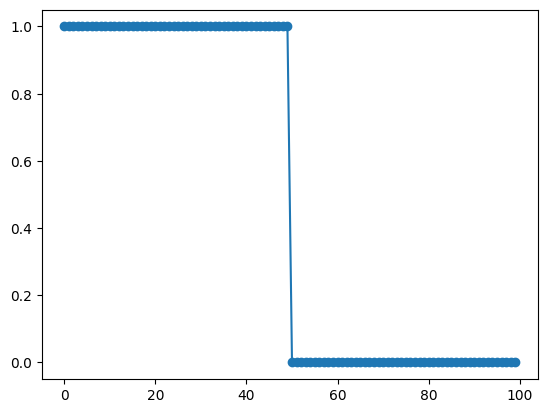

In [526]:
n = 100
x = np.arange(n)
x0 = n * 0.5
X = x < x0
X = np.array(X)
plt.plot(x,X, marker ='o')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


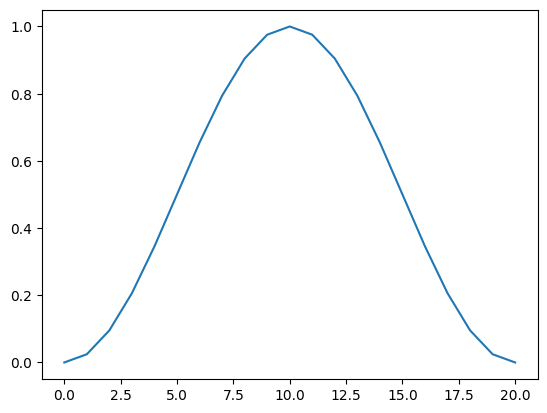

In [527]:
# Create filter.
M = 20
y = np.arange(M + 1)
H = 1/2 - 1/2* np.cos((y*np.pi) * 2/ M)
H = np.array(H)
plt.plot(y,H)

In [528]:
# Check frequency domain.
# plt.plot(y, fft.fftshift(np.fft.fft(H)))

In [529]:
print(H)

[0.         0.02447174 0.0954915  0.20610737 0.3454915  0.5
 0.6545085  0.79389263 0.9045085  0.97552826 1.         0.97552826
 0.9045085  0.79389263 0.6545085  0.5        0.3454915  0.20610737
 0.0954915  0.02447174 0.        ]


In [552]:
# fractional shift
delta = 20.1
G= np.exp(-2j * wavenum(x, n) / n * np.pi * delta)
if n & 1:
    idx0, idx1 = n//2, 1 + n//2
    #ambiguous = np.exp(-2j * (n - 1) / n * np.pi * delta)
    # print("wavenums", wavenum(idx0), wavenum(idx1))
    # print("H:", H[idx0], H[idx1])
else :
    idx0 = n//2
    ambiguous = np.exp(-2j * (n//2) / n * np.pi * delta)
    # print("H:", H[idx0], ambiguous)
    G[idx0] = 0.5 * (ambiguous + 1/ambiguous)
    # print("new H:", H[idx0])

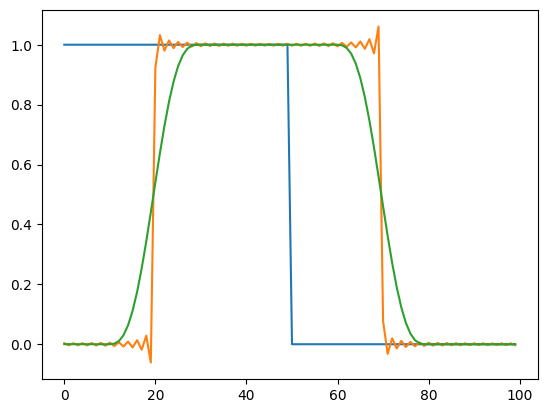

In [553]:
# Apply filter to each point of y
x_shifted = np.fft.ifft(np.fft.fft(X) * G)
x_shifted_filter = np.zeros(n, dtype=complex)


x_shifted_filter = np.convolve(x_shifted, H, 'same')
x_shifted_filter /= (M/2)

# x_shifted_filter = convolve_1d(x_shifted, H)

# for i in range(n):
#     A = 0   
    
#     # At the beginning
#     if i - M//2 < 0:
#         for j in range(n - M // 2, n):
#             A += x_shifted[j] * H[j % M]
#         for j in range(0, M // 2):
#             A += x_shifted[j] * H[j % M]
#         # print(i)
            
            
#     # At the end
#     elif i + M // 2 > n:
#         for j in range(i - M // 2, n):
#             A += x_shifted[j] * H[j % M]
#         for j in range(0, M // 2):
#             A += x_shifted[j] * H[j % M]
#         # print(i)
        
#     # In the middle.
#     elif i > M // 2 and i + M // 2  < n:
#         for j in range(i - M//2, i + M//2):
#             A += x_shifted[j] * H[j % M] 
            
#         # print(i)
#     x_shifted_filter[i] = A

# x_shifted_filter /= M
plt.plot(x,X)
plt.plot(x,x_shifted.real)
plt.plot(x,x_shifted_filter)